In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### This page is a simple demonstration of Locally Weighted Regresssion (LOWESS)

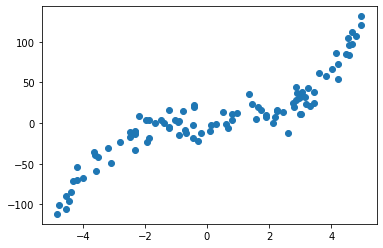

In [123]:
# I'm going to generate some data to use for demonstrations

X = np.random.uniform(low=-5,high=5,size=100) # random numbers between -5 and 5
y = (X**3) + 10 * np.random.normal(size=len(X)) # x cubed with random noise 

# So the data looks like this 
plt.scatter(X,y)

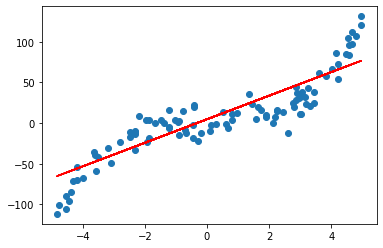

In [128]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts

# We know that a linear regression model won't capture this dataset, but I'll train one quickly for demonstration purposes.

(Xtrain, Xtest, ytrain, ytest) = tts(X, y, test_size=.75) # split the data for training and testing 

linreg = linear_model.LinearRegression() # create regression object
linreg.fit(Xtrain.reshape(-1,1), ytrain) # fit to the training data

y_pred = linreg.predict(Xtest.reshape(-1,1)) # predict based on the testing data

# Let's plot this model on the data

fig, ax = plt.subplots(1,1)

plt.scatter(X,y)
plt.plot(Xtest, y_pred, '-', color='red')

plt.show()


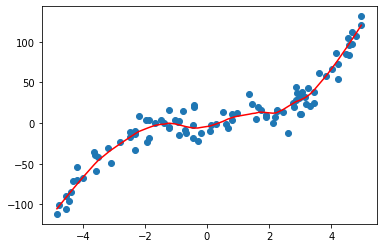

In [165]:
# Clearly, a linear model won't be able to capture non-linear trends. 
# Instead of a linear model, if we use locally weighted regression, we can capture many, small linear trends and model a non-linear relationship.

import statsmodels.api as sm
import scipy.stats as stats

# I'll use statsmodel first
lowess = sm.nonparametric.lowess

y_statsmodel = lowess(exog=X,endog=y,frac=.2) # apply lowess


fig, ax = plt.subplots(1,1)

plt.scatter(X,y)
plt.plot(y_statsmodel[:,0],y_statsmodel[:,1], color='red')

In [142]:
# Compared to the linear model, lowess appears much closer. But lets see if we can do better.
# This is the lowess definition we wrote in class. 

from scipy import linalg

def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau))
    
def weights_matrix(x,tau):
  n = len(x)
  return np.array([kernel_function(x,x[i],tau) for i in range(n)]) 

def lowess_bell_shape_kern1(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> the estimate of y denoted "yest"
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function    
    # here w is an nxn matrix
    w = weights_matrix(x,tau)    
    
    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

In [166]:
y_lowess = lowess_bell_shape_kern1(X,y,tau=.1) # I played with the tau value quite a bit

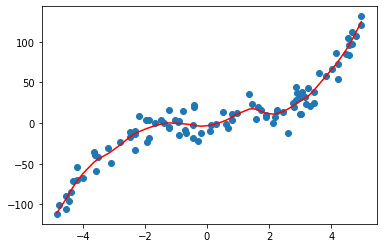

In [167]:
plt.scatter(X,y)
plt.plot(X[np.argsort(X)], y_lowess[np.argsort(X)], color='red')

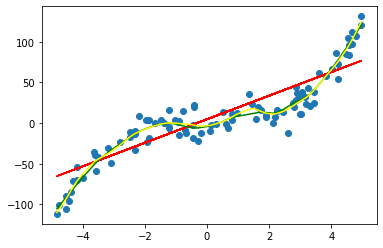

In [182]:
## Lets plot all three of these models on the data

fig, ax = plt.subplots(1,1)

plt.scatter(X,y)
plt.plot(Xtest, y_pred, '-', color='red')
plt.plot(y_statsmodel[:,0],y_statsmodel[:,1], color='green')
plt.plot(X[np.argsort(X)], y_lowess[np.argsort(X)], color='yellow')